# imports

In [1]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
import math
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns

# Loading file
Loding file finally created by _'Data Visualization and Preprocessing'_

In [2]:
data  =  pd.read_csv('final_data.csv')

In [3]:
data.head()

,Day_name,Time,Name
0,Wednesday,1105,ct
1,Wednesday,1028,ct
2,Wednesday,1028,sd
3,Tuesday,1032,sd
4,Monday,2328,sk


# Pre-processing
STEP-I: Encode data which are str type amd OneHot encode name 

STEP-II: Cyclic Normalize Day and hour coloumn

In [4]:
# STEP I :
Day_name_dict = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 
                 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
data['Day_name'] =  [i for i in map(lambda x: Day_name_dict[x], data['Day_name'])]

In [5]:
enc = preprocessing.OneHotEncoder()
enc.fit(data['Name'].values.reshape(-1,1))
y = enc.transform(data['Name'].values.reshape(-1,1))

In [6]:
data.head()

,Day_name,Time,Name
0,2,1105,ct
1,2,1028,ct
2,2,1028,sd
3,1,1032,sd
4,0,2328,sk


In [7]:
#STEP II
data['Day_sin'] = np.sin(2*math.pi*data['Day_name']/7)
data['Day_cos'] = np.cos(2*math.pi*data['Day_name']/7)
data['Time_sin'] = np.sin(2*math.pi*data['Time']/24)
data['Time_cos'] = np.cos(2*math.pi*data['Time']/24)

In [8]:
data.head()

,Day_name,Time,Name,Day_sin,Day_cos,Time_sin,Time_cos
0,2,1105,ct,0.974928,-0.222521,2.588190e-01,0.965926
1,2,1028,ct,0.974928,-0.222521,-8.660254e-01,0.500000
2,2,1028,sd,0.974928,-0.222521,-8.660254e-01,0.500000
3,1,1032,sd,0.781831,0.623490,-1.763739e-14,1.000000
4,0,2328,sk,0.000000,1.000000,-4.507443e-14,1.000000


We want to maintain the cyclic nature of _Day_ and _Time_ feature. Therefore spliting each column into sin and cos and plotting it wrt circle.

In [9]:
X = data.as_matrix(columns=['Day_sin', 'Day_cos', 'Time_sin', 'Time_cos'])

E:\Users\USER\Anaconda3\envs\tf-gpu-p36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


# Visualization

Text(0.5, 1.0, 'Time on Circle')

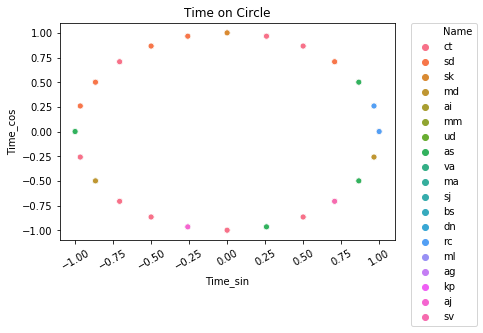

In [10]:
sns.scatterplot(data['Time_sin'], data['Time_cos'],
                data=data,
                hue='Name')
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Time on Circle", )

Text(0.5, 1.0, 'Day on Circle')

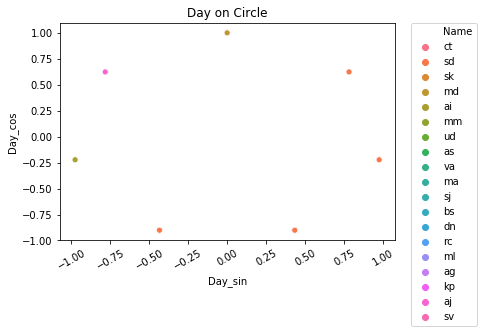

In [11]:
sns.scatterplot(data['Day_sin'], data['Day_cos'],
                data=data,
                hue='Name')
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Day on Circle", )

# Spliting training and test data
20% of test data is seperated from orginal data. And the data is shuffled by default.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [13]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((235, 4), (235, 19), (188, 4), (47, 4), (188, 19), (47, 19))

# Model Training

In [14]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

# Model Prediction

For now we are just considering 3 nearest neighbour of a test point. And if any one of the neighbour matches with the actual data, we will consider it right answer. 

In [15]:
# Getting 3 nearest neighbour
res = model.kneighbors(X=X_test, n_neighbors=3, return_distance=False)

In [16]:
"""
The res contain the indexes(wrt y_train) of nearest neighbour.
Therefore, first we have to access the value. These values are one-Hot encoded,
so we have to inverse transform it.

"""
result = [enc.inverse_transform([y_train[i] for i in res][j]).reshape(-1,3) for j in range(len(res))]

### Calculating __precision__, __recall__ & __f1__ score. By defination -

__Precision__ : Out of the predicted values how hany of them are acurrately predicted.
\begin{align}
Precision & = \frac{Total\ correctly\ predicted\ contact}  {Total\ predicted\ contact} \\
\end{align}


__Recall__ : Out of all the correct values how many of them we are able to predict.
\begin{align}
Recall & = \frac{Total\ correctly\ predicted\ contact}  {Total\ contact\ in\ test\ example} \\
\end{align}



__F1__ : It's the harmonic mean b/w precision and recall and it gives the balanced idea for both values.
\begin{align}
F1 & = \frac{2 \times Precision \times Recall}  {Precision + Recall} \\
\end{align}

In [17]:
prec = []
recall = []
for i in range(len(res)):
    if enc.inverse_transform(y_test)[i] in result[i]:
        prec.append(1/3)
        recall.append(1/1)
    else:
        prec.append(0)
        recall.append(0)

In [18]:
print("Model average precision {0:.2f} & recall is {0:.2f}".format(mean(prec), mean(recall)))

Model average precision 0.20 & recall is 0.20


In [19]:
print("f1 score: {0:.2f}".format(2*mean(prec)*mean(recall)/(mean(prec) + mean(recall))))

f1 score: 0.30


# End

__What if:-__

1) Consider more/less then 3 nearest 